In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier

In [2]:
#importing diabetes dataset
diab = pd.read_csv('diabetes.csv')

#showing head
diab.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
#checking dataframe shape
diab.shape

(768, 9)

In [4]:
#cheching for null values
diab.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

there are no null values...but since soe values can not be zero (eg, glucose),I can fill hem with the mean this way:

In [5]:
non_zero = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']
for coloumn in non_zero:
    diab[coloumn] = diab[coloumn].replace(0,np.NaN)
    mean = int(diab[coloumn].mean(skipna = True))
    diab[coloumn] = diab[coloumn].replace(np.NaN, mean)
    print(diab[coloumn])

0      148.0
1       85.0
2      183.0
3       89.0
4      137.0
       ...  
763    101.0
764    122.0
765    121.0
766    126.0
767     93.0
Name: Glucose, Length: 768, dtype: float64
0      72.0
1      66.0
2      64.0
3      66.0
4      40.0
       ... 
763    76.0
764    70.0
765    72.0
766    60.0
767    70.0
Name: BloodPressure, Length: 768, dtype: float64
0      35.0
1      29.0
2      29.0
3      23.0
4      35.0
       ... 
763    48.0
764    27.0
765    23.0
766    29.0
767    31.0
Name: SkinThickness, Length: 768, dtype: float64
0      155.0
1      155.0
2      155.0
3       94.0
4      168.0
       ...  
763    180.0
764    155.0
765    112.0
766    155.0
767    155.0
Name: Insulin, Length: 768, dtype: float64
0      33.6
1      26.6
2      23.3
3      28.1
4      43.1
       ... 
763    32.9
764    36.8
765    26.2
766    30.1
767    30.4
Name: BMI, Length: 768, dtype: float64


In [6]:
#all the column except the last one
X =diab.iloc[:,0:8]

#just outcome column
y =diab.iloc[:,8]

#feature scaling
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

#testing and training SET
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0, stratify=y)

In [7]:
#decision tree model and fitting
clf = DecisionTreeClassifier(max_depth=3) 
clf.fit(X_train,y_train)

#predictions and model accuracy
y_pred = clf.predict(X_test)
print(f'Model accuracy on test set: {accuracy_score(y_test, y_pred):.2f}')

Model accuracy on test set: 0.79


In [8]:
#best depth
for d in [3,5,10, 12, 15]:
    model = DecisionTreeClassifier(max_depth=d)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    validation_accuracy = accuracy_score(y_test, y_pred)
    print('Validation accuracy with d {}: {:.2f}'.format(d, validation_accuracy))  

Validation accuracy with d 3: 0.79
Validation accuracy with d 5: 0.79
Validation accuracy with d 10: 0.79
Validation accuracy with d 12: 0.79
Validation accuracy with d 15: 0.79


In [9]:
cm= confusion_matrix(y_test, y_pred)
cm

array([[84, 16],
       [16, 38]])

In [10]:
#precision score
precision = precision_score(y_test, y_pred)

print(f'{precision: .2f}')

 0.70


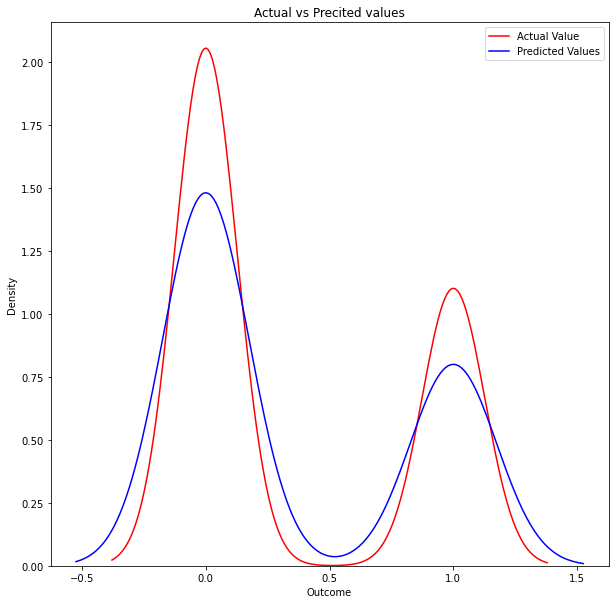

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 10))

#diabetes outcome (Kernel Density Estimation)
ax = sns.kdeplot(y, color="r", label="Actual Value") #y = diab['Outcome']

#predictions (Kernel Densiti Estimation), in the same plot (ax=ax)
sns.kdeplot(y_pred, color="b", label="Predicted Values", ax=ax)

#labeling title
plt.title('Actual vs Precited values')

#showing legend
plt.legend()

#showing plot
plt.show()